<a href="https://colab.research.google.com/github/ryandequintal/2.156/blob/main/CP2_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.155/6 Challenge Problem 2

<div style="font-size: small;">
License Terms:  
These Python demos are licensed under a <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>. They are intended for educational use only in Class 2.155/2.156: AI and ML for Engineering Design at MIT. You may not share or distribute them publicly, use them for commercial purposes, or provide them to industry or other entities without permission from the instructor (faez@mit.edu).
</div>

<font size="1">
  Pixel Art by J. Shung. </font>

In [ ]:
!git clone https://github.com/Lyleregenwetter/2155-Challenge-Problem-2
%cd 2155-Challenge-Problem-2/
from utils_public import *

Cloning into '2155-Challenge-Problem-2'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 55 (delta 0), reused 1 (delta 0), pack-reused 52 (from 1)
Receiving objects: 100% (55/55), 54.94 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (24/24), done.
/content/2155-Challenge-Problem-2/2155-Challenge-Problem-2


# Overview
In this challenge problem, you've been hired as an urban planner for an urban development project in a budding city. The city is rapidly expanding and has a large area that they are looking to zone. The mayor has asked you to consult with several of their advisors to figure out an optimal zoning strategy. These advisors are an interesting bunch. They mean well, but they are somewhat biased towards their own areas of expertise. Pleasing all of them will be tricky!

## Let's meet the advisors:
**The Wellness Advisor:** With a background in the parks & recreation department of the city government, the wellness advisor is focused on the health and wellbeing (both physical and mental) of citizens. Among other things, they are very invested in the quality and accessibility of city's green spaces.

**The Tax Advisor:** With a background in the revenue department of the city government, the tax advisor is focused on balancing city expenditures with income and keeping the city's economy afloat. Among other things, they are invested in maximizing property value, increasing commercial activity, and reducing city expenditures.  

**The Transportation Advisor**: As a former executive in the local public transportation authority, the transportation advisor places an emphasis on accessibility and emissions. Among other objectives, they are focused on minimizing the distance over which the workforce needs to commute.

**The Business Advisor:** As a professor emeritus of economics at the state college in the city, the economic advisor is fixated on the general economic prosperity of the city's businesses and inhabitants. They largely prioritize the overall economic output of the city.

![image](https://raw.githubusercontent.com/Lyleregenwetter/2155-Challenge-Problem-2/refs/heads/main/assets/advisors.png "Advisors")

## Understanding The Data:
The mayor has provided you access to a large dataset of possible zoning configurations. Additionally, the mayor asked the advisors to score some of these zoning configurations according to their subjective opinions of efficacy. Since the advisors are "only human" they have only been able to label 5,000 configurations each. Some of their assessments may seem dubious to you, but they mayor insists that the advisors are "experts" and their ratings should not be questioned.


![alt text](https://raw.githubusercontent.com/Lyleregenwetter/2155-Challenge-Problem-2/refs/heads/main/assets/mayor.png "Mayor")

### Understanding City Zoning:
To understand the data, first we need to understand the city zoning scheme. Typically, a city government 'zones' areas of the city into districts, giving the government some amount of control over what goes on in each distict. To simplify, we will be representing city districts as discrete spaces in a 7x7 grid. Each grid space will be filled with exactly one of five types of zones. We will discuss the districts below:

**Residential Zones [0]:** Residential zones are comprised primarily of housing and are where the workforce lives.

**Industrial Zones [1]:** Industrial zones are the manufacturing centers of the city, packed with factories producing food and goods.

**Commercial Zones [2]:** Commercial zones are the retail hubs of the city, consisting of markets, stores, and restaurants.

**Park Zones [3]:** City parks are the green spaces of the city -- small tastes of nature within an urban environment.

**Office Zones [4]:** Office zones are the enterprise centers of global corporations and local businesses alike.

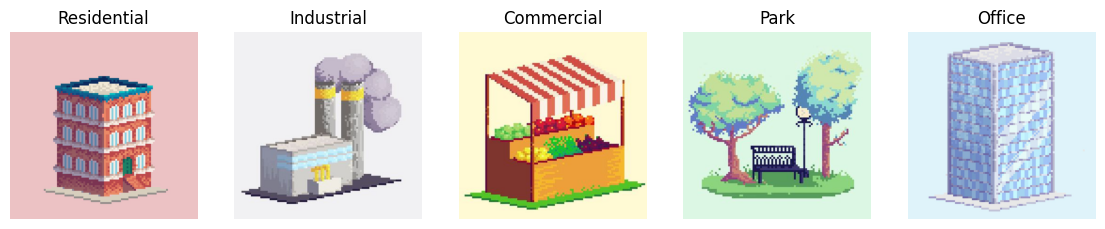

In [ ]:
plot_districts()

### Examining the Data:

Let's take a look at the data. First, lets have a look at the zoning layouts you are given.

In [ ]:
grids = load_grids()
grids.shape

(500000, 7, 7)

Let's examine the first grid in the dataset. It consists of 7x7 entries, each ranging from 0 to 4. The entries denote the district occupying the grid space (labeled above).

In [ ]:
grids[0]

array([[1., 1., 0., 3., 3., 3., 0.],
       [0., 3., 3., 2., 0., 0., 4.],
       [1., 4., 4., 3., 0., 4., 4.],
       [0., 0., 2., 0., 0., 0., 0.],
       [0., 4., 2., 4., 2., 1., 1.],
       [1., 0., 4., 1., 2., 2., 2.],
       [1., 4., 4., 1., 2., 4., 1.]])

Let's visualize some of these grids. We have provided some utilities, mainly focused on visualization, which we imported at the top of the notebook.

In [ ]:
plot_n_grids(grids[:7])

Now lets have a look at the advisor scores:

In [ ]:
import numpy as np
import pandas as pd

ratings = np.load("datasets/scores.npy")
ratings_df = pd.DataFrame(ratings, columns = ["Wellness", "Tax", "Transportation", "Business"])
display(ratings_df)

,Wellness,Tax,Transportation,Business
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
499995,NaN,NaN,NaN,0.04446
499996,NaN,NaN,NaN,NaN
499997,NaN,NaN,NaN,NaN
499998,NaN,NaN,NaN,NaN


We can see that the vast majority of ratings are NaN. After all, only 1% of the data is labeled. Let's confirm that there are the right number of NaNs in each column:

In [ ]:
ratings_df.isna().sum()

,0
Wellness,495000
Tax,495000
Transportation,495000
Business,495000


Let's plot the distribution over the scores that are rated. We see that each advisor's scores are bounded between 0 and 1 and are fairly uniformly distributed.

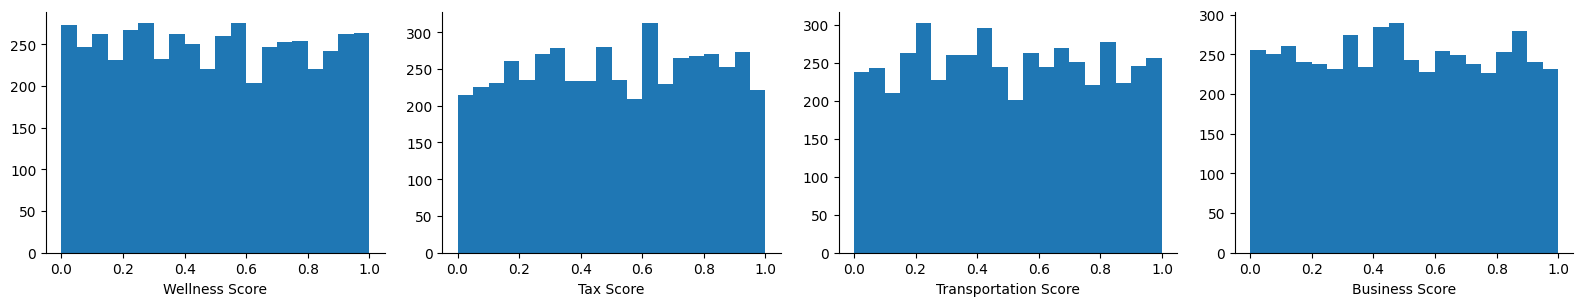

In [ ]:
plot_ratings_histogram(ratings)

## The Task
The mayor wants you to provide them with a maximally diverse set of 100 city grids that the advisors will approve of. However, the advisors are picky. They will thow a fit over any design that they rate less than 0.75 and demand it thrown out, so any design considered valid must be rated at least 0.75 by EACH advisor. Any designs that are rated below a 0.75 by any advisor are considered invalid and will not contribute to the diversity calculation.

The diversity score is calculated using a pairwise diversity matrix over the 100 grids that you submit. The pairwise distance between two valid grids is calculated using a normalized Hamming distance. The pairwise distance between an invalid grid and any other grid is automatically set to zero. The final diversity score is calculated as the mean of this matrix. (Note: Exmaple scores are made-up)

A visual overview of the scoring is shown below for an example set of 5 grids (submission will always have 100), where grids 2 and 5 are invalid, and the detailed distance calculation is shown for grids 1 and 3.



![](https://github.com/Lyleregenwetter/2155-Challenge-Problem-2/blob/main/assets/scoring_overview.png?raw=true)

### Scoring Examples
To build further intuition using the diversity score, we show a few hands-on examples. Lets first calculate the diversity of the first 100 grids in the dataset. For now, we will assume every grid is valid.

In [ ]:
subset = grids[:100]
original_score = diversity_score(subset) #calls diversity score function from utils
print(f"Diversity Score: {original_score:.4f}")

Diversity Score: 0.7894


This is actually pretty close to the theoretical maximum score for 100 grids, 0.8. Now lets calculate the diverisity in three other cases. In the first case, let's set the top left corner of every grid to be a residential zone and check how the diversity is affected. In the next, let's make the first two grids the exact same. In the last let's remove a grid entirely, as might happen if you submit an invalid grid, and calculate the diversity over 99 grids.

In [ ]:
c1 = subset.copy() #Case 1
c1[:,0,0] = 0 #set top left of all hundred grids to 0 (residential)
c1_score = diversity_score(c1)
print(f"Diversity Score: {c1_score:.4f} (change: {c1_score - original_score:.4f})")

c2 = subset.copy() #Case 2
c2[1,:,:] = c2[0,:,:] #set first grid equal to second grid
c2_score = diversity_score(c2)
print(f"Diversity Score: {c2_score:.4f} (change: {c2_score - original_score:.4f})")

c3 = subset.copy() #Case 3
c3 = c3[1:] #remove first grid
c3_score = diversity_score(c3)
print(f"Diversity Score: {c3_score:.4f} (change: {c3_score - original_score:.4f})")


Diversity Score: 0.7732 (change: -0.0162)
Diversity Score: 0.7893 (change: -0.0001)
Diversity Score: 0.7738 (change: -0.0156)


As you can see, having a duplicate grid has minimal impact on the score (or can in rare cases increase the score if the duplicated zoning plan is very different from the others). However, having the same district in the same location in every grid has a significant impact on diversity score. Similarly, excluding grids has a strong impact. In general, this scoring is very punishing for invalid designs - you may want to keep this in mind as you pick a method to select or generate solutions.

Also bear in mind that the advisor scores don't matter as long as they are greater than 0.75. Aside from calculating validity, they are not further used in the scoring.

# Starter Code

In this section, we implement a basic solution for the challenge problem. The approach is as follows:
- Fit regressors to predict advisor scores for the missing values in the dataset of grids.
- Select 100 grids to submit by selecting the 100 grids with highest minimum advisor score.

We hope that you will significantly improve both steps in your solution and try more advanced methods (optimization, data augmentation, diverse sampling, uncertianty quantification, etc.)

## Fitting Regressors:

We will train one regressor for each advisor. First, we will make use of a provided helper function that grabs the labeled subset of the dataset for some advisor. Let's start with the wellness advisor:

In [ ]:
advisor = 0 #select advisor 0 for now.
grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,advisor]) #gets subset of the dataset
print(grids_subset.shape)
print(ratings_subset.shape)

(5000, 7, 7)
(5000,)


We will fit a very simple regression model. We first flatten the grids into an n x 49 array. Then we fit a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

grids_flat = grids_subset.reshape(-1, 49) #flatten the grids

grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_flat, ratings_subset)

LR = LinearRegression() #initialize
LR.fit(grids_train, ratings_train) #fit
print("Model Fitted!")

Model Fitted!


### Visualization and Evaluation:

We'll make a quick function to evaluate r2 score and plot our predictions against the ground truth values

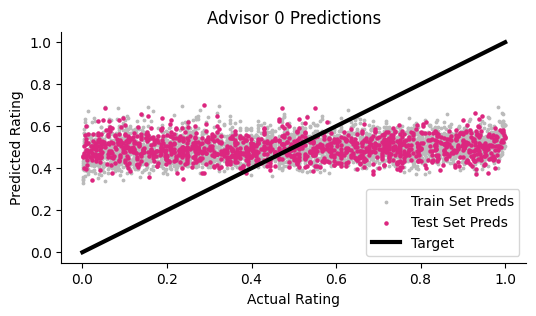

Advisor 0 Train Set R2 score: 0.03250964860923866
Advisor 0 Test Set R2 score: -0.017445977602180696


In [ ]:
from sklearn.metrics import r2_score
def plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, advisor):
    #Calculates
    plt.figure(figsize=(6,3))
    plt.scatter(ratings_train, preds_train, label='Train Set Preds', s=3, c = "#BBBBBB") #train set in gray
    plt.scatter(ratings_test, preds_test, label='Test Set Preds', s=5, c = "#DC267F") #test set in magenta
    plt.plot([0,1], [0,1], label="Target", linewidth=3, c="k") #target line in black

    #Set axis labels and title
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Advisor {advisor} Predictions")

    #Turn off top and right spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend() #Display legend
    plt.show() #Show plot

    #Calculate R2 score for train and test sets
    print(f"Advisor {advisor} Train Set R2 score: {r2_score(ratings_train, preds_train)}")
    print(f"Advisor {advisor} Test Set R2 score: {r2_score(ratings_test, preds_test)}")

preds_train = LR.predict(grids_train) #predict on the train set
preds_test = LR.predict(grids_test) #predict on the test set
plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, 0)

Pretty awful. It's essentially learning nothing! Let's try some simple feature engineering. We will count the number of districts of each type and append these 5 new features to our existing 49. We will also compile our feature engineering, data splitting, fitting, and scoring into an easy function.

In [ ]:
def append_district_counts(grids): #performs the feature engineering to add district counts
    grids_flat = grids.reshape(-1, 49) #first flatten the grids

    counts = [np.sum(grids_flat==0, axis=1),
              np.sum(grids_flat==1, axis=1),
              np.sum(grids_flat==2, axis=1),
              np.sum(grids_flat==3, axis=1),
              np.sum(grids_flat==4, axis=1)] #list of 5 length n_grids arrays containing counts of each district
    features = np.stack(counts).T #stack and transpose counts to get n_grids x 5 array
    return np.hstack([grids_flat, features]) #stack the features horizontally with the flattened grids


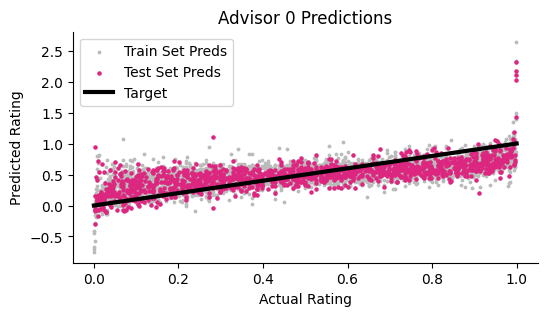

Advisor 0 Train Set R2 score: 0.5005812800982383
Advisor 0 Test Set R2 score: 0.49166503611549484


In [ ]:
def FE_split_train_eval(grids, FE_fn, advisor, ratings_subset): #feature engineering, split, train, evaluate
    grids_fa = FE_fn(grids) #call the provided feature engineering function on the grids
    grids_train, grids_test, ratings_train, ratings_test = train_test_split(grids_fa, ratings_subset) #split

    LR = LinearRegression() #initialize
    LR.fit(grids_train, ratings_train) #fit

    preds_train = LR.predict(grids_train) #predict on the train set
    preds_test = LR.predict(grids_test) #predict on the test set
    plot_and_r2(preds_train, preds_test, ratings_train, ratings_test, advisor) #plot and calculate R2
    return LR

LR = FE_split_train_eval(grids_subset, append_district_counts, 0, ratings_subset)


That's a small improvement. But you can do better! You can try designing more features to feed into the regression model. But since you can only guess as to what the advisors really care about, you'll always be grasping at straws. For this reason, if you go for feature engineering, we recommend using a wide net of features. In a technical domain where you have expert knowledge, directed feature engineering may be a better choice.

In any case, we proceed for now. We provide a simple function to merge the predictions with the semi-labeled dataset to avoid overwriting the given labels, but populate the blanks with predictions.

In [ ]:
def merge_predictions(grids, ratings, FE_fn, predictor): #Combine predictions and real ratings
    full_dataset_FA = FE_fn(grids) #feature engineering on full dataset
    predictions = predictor.predict(full_dataset_FA) #predict on full dataset

    mask = np.where(~np.isnan(ratings)) #get the indices of the rated grids
    predictions[mask] = ratings[mask] #replace the predictions with the actual ratings where available
    return predictions

merged_predictions = merge_predictions(grids, ratings[:,0], append_district_counts, LR) #call function

Since we need to do this for each advisor, lets compile the various bits of code we wrote into a single function here:

In [ ]:
def fit_plot_predict(grids, ratings, advisor):
    grids_subset, ratings_subset = select_rated_subset(grids, ratings[:,advisor]) #gets subset of the dataset rated by advisor 0

    FE_fn = append_district_counts # Select append_district_counts as our feature engineering function

    LR = FE_split_train_eval(grids_subset, FE_fn, advisor, ratings_subset) #feature engineering, split, train, evaluate

    predictions = merge_predictions(grids, ratings[:,advisor], FE_fn, LR) #merge predictions with actual ratings
    return predictions

### Fitting Regressors for other three advisors:

Finally, we loop over the four advisors:

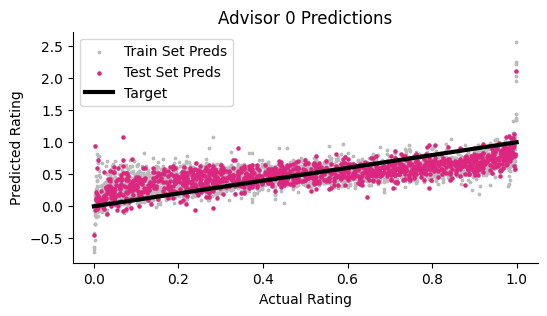

Advisor 0 Train Set R2 score: 0.4941554247546679
Advisor 0 Test Set R2 score: 0.5129326434676711


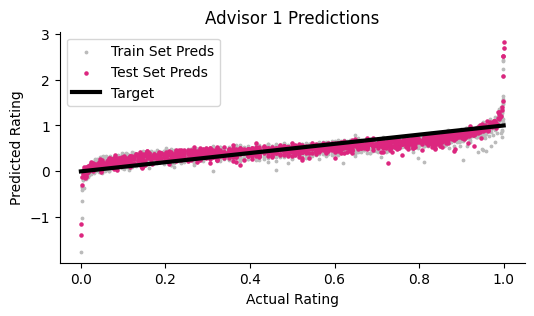

Advisor 1 Train Set R2 score: 0.7408862197380934
Advisor 1 Test Set R2 score: 0.6445790543161903


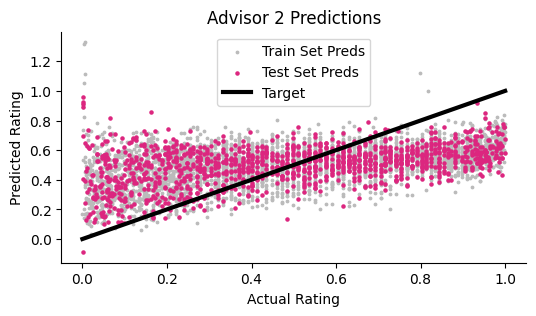

Advisor 2 Train Set R2 score: 0.20394143944062249
Advisor 2 Test Set R2 score: 0.18138912022137466


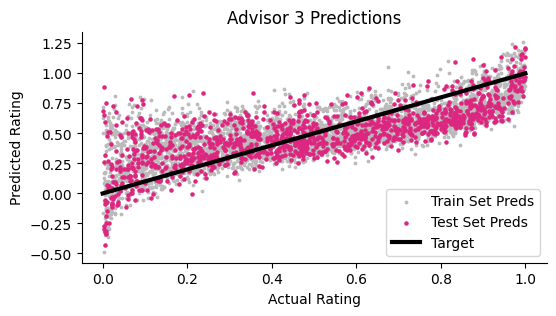

Advisor 3 Train Set R2 score: 0.5664934341391406
Advisor 3 Test Set R2 score: 0.5241825303992006


In [ ]:
all_predictions = [] #empty list to hold predictions
for i in range(0,4): #loop over four advisors
    predictions = fit_plot_predict(grids, ratings, i) #call the above function
    all_predictions.append(predictions) #append predictions

## Selecting Best Grids:

We stack the predictions together and identify the lowest advisor score for each design. We indentify the 100 designs with the highest minimum score and submit those.

**Note: submitted solutions do not need to come from the dataset. We highly recommend that you design new city grids to submit.**

In [ ]:
final_prediction_array = np.stack(all_predictions).T #stack the predictions
min_predictions = np.min(final_prediction_array, axis=1) #minimum advisor score (as predicted)
print(f"Number of valid grids (as predicted): {np.sum(min_predictions>0.75)}") #number of valid grids (as predicted)
top_100_indices = np.argpartition(min_predictions, -100)[-100:] #indices of top 100 designs (as sorted by minimum advisor score)
top_100_grids = grids[top_100_indices] #get the top 100 grids

Number of valid grids (as predicted): 0


It seems like none of the designs in the dataset are projected to be valid according to our regressors. However, we can see from our regression plots that our regression models underpredict scores for many of the top designs. So with some luck, some of these may be valid. Let's take a look at a histogram of the predicted scores:

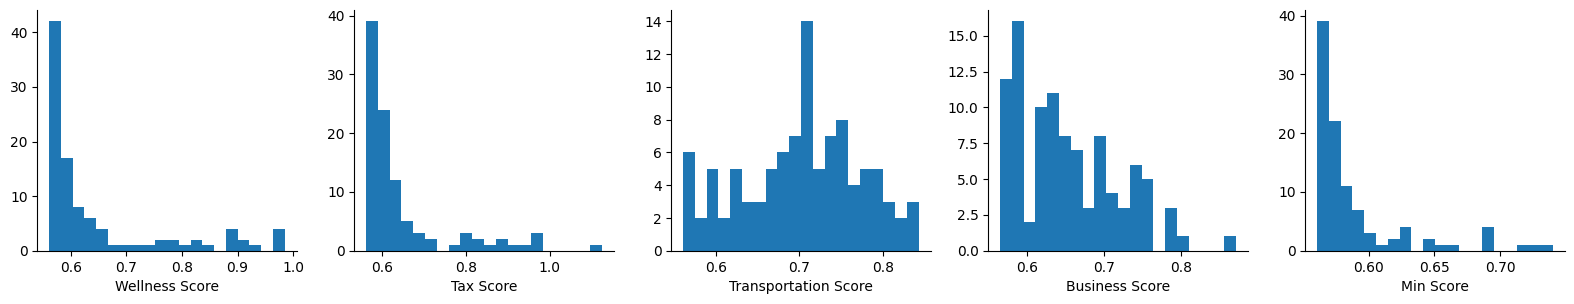

In [ ]:
plot_ratings_histogram(final_prediction_array[top_100_indices], withmin=True) #plot histograms of top 100 designs

Let's visualize a few designs.

<Figure size 640x480 with 0 Axes>

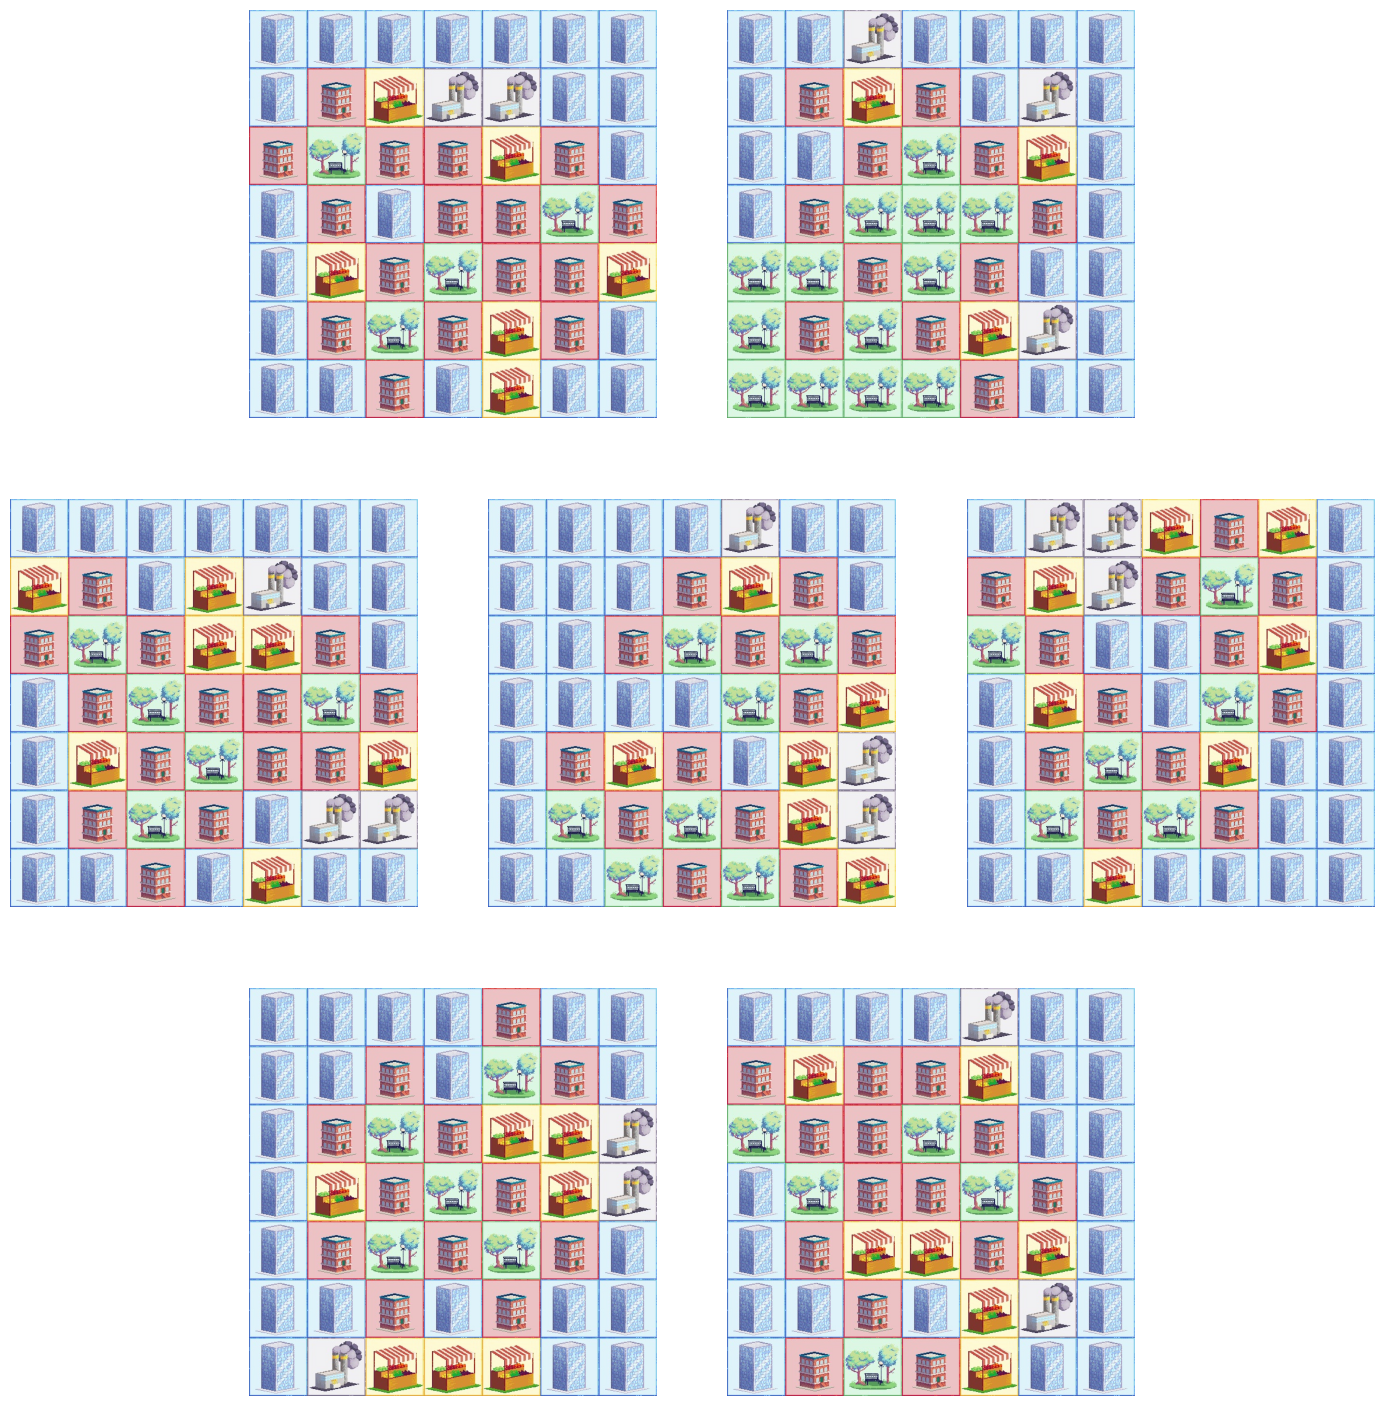

In [ ]:
plot_n_grids(top_100_grids[-7:])


These don't seem particularly diverse. Don't forget that your final score is based on diversity. Selecting the top 100 designs may not be the best method to generate a diverse subset!

Lets check what the diversity score would be if all 100 of these are valid:

In [ ]:
score = diversity_score(top_100_grids)
print(f"Hypothetical diversity score if all top 100 grids are valid: {score:.4f} ")

Hypothetical diversity score if all top 100 grids are valid: 0.6633 


## Preparing a submission:
Let's prepare a submission. We expect the final submission to be a 100x7x7 numpy array of integers between 0 and 4, inclusive. Note: we do NOT need your predicted scores. We will ask the advisors to score your submissions directly!

In [ ]:
final_submission = grids[top_100_indices].astype(int)

You can verify that your submission is formatted properly with the following asserts:

In [ ]:
assert final_submission.shape == (100, 7, 7)
assert final_submission.dtype == int
assert np.all(np.greater_equal(final_submission, 0) & np.less_equal(final_submission, 4))

In [ ]:
np.save(f"submission.npy", final_submission)